# Lab 10: Deep Reinforcement Learning

## Objective

- Build DQN and PPO Deep RL algorithms
- Learn the difference between Q Learning and Policy Gradient techniques

## Deliverable

For this lab you will submit an ipython notebook via learning suite. This lab gives you a lot of code, and you should only need to modify two of the cells of this notebook. Feel free to download and modify this notebook or create your own. The below code is given for your convenience. You can modify any of the given code if you wish.

## Tips

Deep reinforcement learning is difficult. We provide hyperparameters, visualizations, and code for gathering experience, but require you to code the algorithms for training your networks. 

- Your networks should be able to demonstrate learning on the cartpole problem within a minute of wall time.

- Understand what the starter code is doing. This will help you with the *TODO* sections. The main code block is similar for the two algorithms with some small yet important differences.

- We provide hyperparameters for you to start with. Feel free to experiment with different values, but these worked for us.

- **Print dtypes and shapes** throughout your code to make sure your tensors look the way you expect.

- The DQN algorithm is significantly more unstable than PPO. Even with a correct implementation it may fail to learn every 1/10 times.

- Unfortunately visualizing your agent acting in the environment is non-trivial in Colab. You can visualize your agent by running this code locally and uncommenting the `env.render()` line.

## Grading

- 40% Part 1: DQN *TODO* methods
- 40% Part 2: PPO *TODO* methods
- 20% Cartpole learning curves


### Cartpole

Cartpole is a simple environment to get your agent up and running. It has a continuous state space of 4 dimensions and a discrete action space of 2. The agent is given a reward of 1 for each timestep it remains standing. Your agent should be able to reach close to 200 cumulative reward for an episode after a minute or two of training. The below graphs show example results for dqn (left) and ppo (right).

![alt text](https://drive.google.com/uc?export=view&id=1Bpz1jOPMF1zJMW6XBJJ44sJ-RmO_q6_U)
![alt text](https://drive.google.com/uc?export=view&id=1M1yygXhLKDL8qfRXn7fh_K-zq7-pQRhY)

### TODO

- Train DQN and PPO on cartpole
- Display learning curves with average episodic reward per epoch

# Starter Code

## Init

In [1]:
! pip3 install gym
! pip3 install torch
####################
! pip install gym pyvirtualdisplay
! apt-get install -y xvfb python-opengl ffmpeg
####################

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,687 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 1,280 kB in 0s (8,880 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package xvfb.
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_a

In [2]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
from itertools import chain
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import random
from torch.utils.data import Dataset, DataLoader
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

####################
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
####################

In [4]:
######################
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400,900))
display.start()
######################

In [5]:
######################
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env
######################

## DQN

## Part 1


Deep Q-Network (https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf) is a Q-learning algorithm that learns values for state-action pairs.

Actions are sampled according to an $\epsilon-greedy$ policy to help with exploration of the state space. Every time an action is sampled, the agent chooses a random action with $\epsilon$ probability. Otherwise, the agent selects the action with the highest Q-value for a state. $\epsilon$ decays over time according to $\epsilon \gets \epsilon * epsilon\_decay$.

Tuples of state, action, reward, next_state, and terminal $(s,a,r,s',d)$ are collected during training. Every $learn\_frequency$ steps $sample\_size$ tuples are sampled and made into 5 tensors of states, actions, rewards, next_states, and terminals.

The loss for a batch of size N is given below.

$Loss=\frac{1}{N}\sum \bigg(Q(s,a) - (r + \gamma \underset{a'\sim A}{max} \hat{Q}(s',a')(1-d))\bigg)^2 $

Loss is calculated and used to update the Q-Network. The target network $\hat{Q}$ begins as a copy of the Q network but is not updated by the optimizer. Every $target\_update$ steps, the target network is updated with the parameters of the Q-Network. This process is a type of bootstrapping.

### TODO

- Implement get action method with e-greedy policy
- Implement sample batch method
- Implement DQN learning algorithm



### Scratchpad: test functions

In [14]:
# Testing argmax (plus conversion to int data type)
test_tensor = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
test_tensor.argmax(dim=1).to(torch.long)

tensor([2, 2, 2])

In [82]:
# Testing concatenation with an empty tensor
test2_tensor = torch.tensor([])
test3_tensor = torch.cat([test_tensor, test2_tensor], dim=1)
print(test3_tensor)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])


In [83]:
# Testing tensor concatenation for batch preparation
test3_tensor = torch.cat([test_tensor, test3_tensor], dim=0)
print(test3_tensor)
print(test3_tensor.size())

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.],
        [0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
torch.Size([6, 3])


In [95]:
# Testing the .max function with batches (dim 0)
test4_tensor = torch.max(test3_tensor, dim=1, keepdim=True)
print(test4_tensor)
print("Values tensor:", test4_tensor[0].shape)

torch.return_types.max(
values=tensor([[2.],
        [5.],
        [8.],
        [2.],
        [5.],
        [8.]]),
indices=tensor([[2],
        [2],
        [2],
        [2],
        [2],
        [2]]))
Values tensor: torch.Size([6, 1])


In [26]:
# Examine the torch.gather() function
# it takes an input tensor and extracts
# elements from that input tensor based on
# the specified dimension and the index into that
# dimension, where the index is given as a 
# separate tensor.
def gather_example():
    state = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
    actions = torch.tensor([[0], [1], [2]])
    print("-------------------")
    print(f"State: {state.shape}")
    print(state)
    print("-------------------")
    print(f"Actions: {actions.shape}")
    print(actions)
    print("-------------------")
    print(f"Gathered: {torch.gather(state, dim=1, index=actions).shape}")
    print(torch.gather(state, dim=1, index=actions))

# Run function
gather_example()

-------------------
State: torch.Size([3, 3])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
-------------------
Actions: torch.Size([3, 1])
tensor([[0],
        [1],
        [2]])
-------------------
Gathered: torch.Size([3, 1])
tensor([[0],
        [4],
        [8]])


In [38]:
# Unsqueeze example
test_tensor = torch.tensor([0, 1, 2])
print(test_tensor.shape)
print(test_tensor)
print('--------------------\nUnsqueezed')
print(test_tensor.unsqueeze(1).shape)
print(test_tensor.unsqueeze(1))

torch.Size([3])
tensor([0, 1, 2])
--------------------
Unsqueezed
torch.Size([3, 1])
tensor([[0],
        [1],
        [2]])


In [122]:
# Multinomial indexing example
torch.multinomial(test_tensor.to(torch.float32), num_samples=1)

tensor([[1],
        [2],
        [2]])

In [21]:
def itertools_chain_example(*iterables):
    test_chain = chain(*iterables)
    for n, item in enumerate(test_chain):
        print(f"{n}: {item}")

iterables = ([0, 1, 2],
             {"One": 1, "Two": 2, "Three": 3}, 
             [3, 4, [5, 6, 7]])

itertools_chain_example(*iterables)

0: 0
1: 1
2: 2
3: One
4: Two
5: Three
6: 3
7: 4
8: [5, 6, 7]


In [22]:
print(*iterables, sep='\n')

[0, 1, 2]
{'One': 1, 'Two': 2, 'Three': 3}
[3, 4, [5, 6, 7]]


In [23]:
for n, item in enumerate(iterables):
    print(f"{n}: {item}")

0: [0, 1, 2]
1: {'One': 1, 'Two': 2, 'Three': 3}
2: [3, 4, [5, 6, 7]]


In [29]:
# test of reversed function
test_list = [('A', 'B', 'C'), ([1], [2], [3])]
for item in reversed(test_list):
    print(item)

([1], [2], [3])
('A', 'B', 'C')


### DQN functions

In [79]:
def get_action_dqn(network, state, epsilon, epsilon_decay):
    """Select action according to e-greedy policy and decay epsilon

    Args:
    network (QNetwork): Q-Network
    state (np-array): current state, size (state_size)
    epsilon (float): probability of choosing a random action
    epsilon_decay (float): amount by which to decay epsilon

    Returns:
    action (int): chosen action [0, action_size)
    epsilon (float): decayed epsilon
    """
    # Get tensor of values for all possible actions
    actions = network(torch.from_numpy(state).float())
    # Get random number for comparing with epsilon
    random_float = random.random()
    if random_float < epsilon:
        # Choose an action at random
        action = random.randint(0, 1)
        # action_size = 2
        # action = torch.randint(low=0, high=action_size, size=(state.shape[0], state.shape[1]))
    else:
        with torch.no_grad():
            # Choose the highest-value action according to policy
            action = actions.argmax(dim=-1).to(torch.long).item()
    
    # Decrease likelihood of random action sampling
    epsilon = epsilon * epsilon_decay

    return action, epsilon


def prepare_batch(memory, batch_size):
    """Randomly sample batch from memory
        Prepare cuda tensors

    Args:
        memory (list): state, action, next_state, reward, done tuples
        batch_size (int): amount of memory to sample into a batch

    Returns:
        state (tensor): float cuda tensor of size (batch_size x state_size)
        action (tensor): long tensor of size (batch_size)
        next_state (tensor): float cuda tensor of size (batch_size x state_size)
        reward (tensor): float cuda tensor of size (batch_size)
        done (tensor): float cuda tensor of size (batch_size)
    """
    # Select random samples from memory
    sampled_batch = random.sample(memory, k=batch_size)
    
    # Create tensors to hold batches along dim 0
    state = torch.tensor([]).to(device)
    action = torch.tensor([]).to(device)
    next_state = torch.tensor([]).to(device)
    reward = torch.tensor([]).to(device)
    done = torch.tensor([]).to(device)

    # Prepare tensors by placing in correct format
    # i.e., concatenating samples along dim 0 to form a batch
    for sample in sampled_batch:
        state = torch.cat([state, torch.tensor(sample[0]).to(device).unsqueeze(dim=0)], dim=0)
        action = torch.cat([action, torch.tensor(sample[1]).to(device).unsqueeze(dim=0)], dim=0)
        next_state = torch.cat([next_state, torch.tensor(sample[2]).to(device).unsqueeze(dim=0)], dim=0)
        reward = torch.cat([reward, torch.tensor(sample[3]).to(device).unsqueeze(dim=0)], dim=0)
        done = torch.cat([done, torch.tensor(sample[4]).to(device).unsqueeze(dim=0)], dim=0)

    return state, action, next_state, reward, done

  
def learn_dqn(batch, optim, q_network, target_network, gamma, global_step, target_update):
    """Update Q-Network according to DQN Loss function
        Update Target Network every target_update global steps

    Args:
        batch (tuple): tuple of state, action, next_state, reward, and done tensors
        optim (Adam): Q-Network optimizer
        q_network (QNetwork): Q-Network
        target_network (QNetwork): Target Q-Network
        gamma (float): discount factor
        global_step (int): total steps taken in environment
        target_update (int): frequency of target network update
    """
    # Collect tensors from the batch
    state, action, next_state, reward, done = batch

    # loss = F.mse_loss(Q(state, action), (reward + gamma * Q_hat(next_state, a_prime) * (1 - done)))
    # Where...
    # Q(state, action) = torch.gather(q_network(state), action)
    # Q_hat(next_state, a_prime) = max(target_network(next_state))
    
    # Q(state, action)
    #   Get tensor of values for all actions at the state
    #   and find values for the selected actions
    # Ensure state is the correct type (float)
    state = state.to(torch.float32)
    # Ensure action is the correct type (int)
    action = action.unsqueeze(1).to(torch.int64)
    values = torch.gather(q_network(state), dim=1, index=action)

    # Q_hat(next_state, a_prime)
    #   Find the highest value for the next state
    #   torch.max() returns a 2-tuple of (values, indices)
    #   torch.argmax() returns the second of those tuples (indices), but we're interested in the first (hence the [0] at the end)
    predicted_values = torch.max(target_network(next_state.to(torch.float32)), dim=1, keepdim=True)[0]

    loss = F.mse_loss(values, 
                      reward.unsqueeze(1) + (
                          gamma * predicted_values * (1 - done.unsqueeze(1))
                          )
                        )

    # Zero-out gradients
    optim.zero_grad()
    # Update gradients through backprop
    loss.backward()
    # Update weights based on gradients
    optim.step()

    # Update target network
    if global_step % target_update == 0:
        target_network.load_state_dict(q_network.state_dict())


### Modules

In [7]:
# Q-Value Network
class QNetwork(nn.Module):
  def __init__(self, state_size, action_size):
    super().__init__()
    hidden_size = 8
    
    self.net = nn.Sequential(nn.Linear(state_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, action_size))  
    
  def forward(self, x):
    """Estimate q-values given state

      Args:
          state (tensor): current state, size (batch x state_size)

      Returns:
          q-values (tensor): estimated q-values, size (batch x action_size)
    """
    return self.net(x)

### Main

In [81]:
def dqn_main():
  # Hyperparameters
  lr = 1e-3
  epochs = 500
  start_training = 1000
  gamma = 0.99
  batch_size = 32
  epsilon = 1
  epsilon_decay = .9999
  target_update = 1000
  learn_frequency = 2

  # Init environment
  state_size = 4
  action_size = 2
  env = gym.make('CartPole-v1', )

  # Init networks
  q_network = QNetwork(state_size, action_size).to(device)
  target_network = QNetwork(state_size, action_size).to(device)
  target_network.load_state_dict(q_network.state_dict())

  # Init optimizer
  optim = torch.optim.Adam(q_network.parameters(), lr=lr)

  # Init replay buffer
  memory = []

  # Begin main loop
  results_dqn = []
  global_step = 0
  loop = tqdm(total=epochs, position=0, leave=False)
  for epoch in range(epochs):
    ######################
    # last_epoch = (epoch+1 == epochs)
    # # Record the last epoch, not the previous epochs
    # if last_epoch:
    #   env = wrap_env(env)
    ######################

    # Reset environment
    state = env.reset()
    done = False
    cum_reward = 0  # Track cumulative reward per episode

    # Begin episode
    while not done and cum_reward < 200:  # End after 200 steps 
      # Select e-greedy action
      action, epsilon = get_action_dqn(q_network, state, epsilon, epsilon_decay)

      # Take step
      next_state, reward, done, _ = env.step(action)
      # env.render()

      # Store step in replay buffer
      memory.append((state, action, next_state, reward, done))

      cum_reward += reward
      global_step += 1  # Increment total steps
      state = next_state  # Set current state

      # If time to train
      if global_step > start_training and global_step % learn_frequency == 0:

        # Sample batch
        batch = prepare_batch(memory, batch_size)
        
        # Train
        learn_dqn(batch, optim, q_network, target_network, gamma, global_step, target_update)
    ######################
    env.close()
    ######################
    # Print results at end of episode
    results_dqn.append(cum_reward)
    loop.update(1)
    loop.set_description('Episodes: {} Reward: {}'.format(epoch, cum_reward))
  
  return results_dqn

results_dqn = dqn_main()
######################
show_video()
######################

  0%|          | 0/500 [00:00<?, ?it/s]

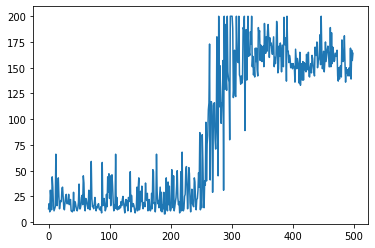

In [82]:
plt.plot(results_dqn)
plt.show()

## PPO

## Part 2

Proximal Policy Optimization (https://arxiv.org/pdf/1707.06347.pdf) is a type of policy gradient method. Instead of calculating Q-values, we train a network $\pi$ to optimize the probability of taking good actions directly, using states as inputs and actions as outputs. PPO also uses a value network $V$ that estimates state values in order to estimate the advantage $\hat{A}$. 

Tuples of state, action distribution, action taken, and return $(s,\pi(s), a,\hat{R})$ are gathered for several rollouts. After training on this experience, these tuples are discarded and new experience is gathered.

Loss for the value network and the policy network are calculated according to the following formula:

$Loss=ValueLoss+PolicyLoss$

$ValueLoss=\frac{1}{N}\sum \bigg(\hat{R} - V(s) \bigg)^2 $

$PolicyLoss=-\frac{1}{N}\sum \min\bigg( \frac{\pi'(a|s)}{\pi(a|s)} \hat{A}, clip(\frac{\pi'(a|s)}{\pi(a|s)},1-\epsilon,1+\epsilon) \hat{A} \bigg) $

$\hat{R}_t = \sum_{i=t}^H \gamma^{i-1}r_i$

$\hat{A}_t=\hat{R}_t-V(s_t)$

Here, $\pi'(a|s)$ is the probability of taking an action given a state under the current policy and $\pi(a|s)$ is the probability of taking an action given a state under the policy used to gather data. In the loss function, $a$ is the action your agent actually took and is sampled from memory. 

Additionally, the $clip$ function clips the value of the first argument according to the lower and upper bounds in the second and third arguments respectively.

Another important note: The calculation of your advantage $\hat{A}$ should not permit gradient flow from your policy loss calculation. In other words, make sure to call `.detach()` on your advantage.

### TODO

- Implement calculate return method
- Implement get action method
- Implement PPO learning algorithm

In [161]:
def calculate_return(memory, rollout, gamma):
    """Return memory with calculated return in experience tuple

    Args:
        memory (list): (state, action, action_dist, return) tuples
        rollout (list): (state, action, action_dist, reward) tuples from last rollout
        gamma (float): discount factor

    Returns:
        list: memory updated with (state, action, action_dist, return) tuples from rollout
    """    
    return_val = 0
    for transition in reversed(rollout):
        state, action, action_dist, reward = transition
        return_val = reward + gamma*return_val
        # Add to memory
        memory.append((state, action, action_dist, return_val))
    
    return memory


def get_action_ppo(network, state):
    """Sample action from the distribution obtained from the policy network

    Args:
        network (PolicyNetwork): Policy Network
        state (np-array): current state, size (state_size)

    Returns:
        int: action sampled from output distribution of policy network
        array: output distribution of policy network
    """
    with torch.no_grad():
        action_distribution = network(torch.tensor(state, dtype=torch.float32).unsqueeze(0))
        # Choose an action at random. multinomial returns indices (which represent the actions)
        action = torch.multinomial(action_distribution, num_samples=1) 
        return action.item(), action_distribution


def learn_ppo(optim, policy, value, memory_dataloader, epsilon, policy_epochs):
    """Implement PPO policy and value network updates. Iterate over your entire 
        memory the number of times indicated by policy_epochs.    

    Args:
        optim (Adam): value and policy optimizer
        policy (PolicyNetwork): Policy Network
        value (ValueNetwork): Value Network
        memory_dataloader (DataLoader): dataloader with (state, action, action_dist, return) tensors
        epsilon (float): trust region
        policy_epochs (int): number of times to iterate over all memory
    """
    for epoch in range(policy_epochs):
        for state, action, old_action_distribution, returns in memory_dataloader:
            # Turn tensors into float tensors
            state = state.type(torch.float32)
            old_action_distribution = old_action_distribution.type(torch.float32)
            returns = returns.type(torch.float32)

            # Calculate the mean-squared-error loss for returns compared to expected value
            value_loss = F.mse_loss(returns, value(state).squeeze())

            # DETACH from computation graph so policy loss doesn't interfere with value loss
            advantage = (returns - value(state).squeeze()).detach()

            # Calculate the action distribution using the policy network
            current_action_distribution = policy(state)

            # Compare the current and prior values given action distributions
            policy_ratio = (
                torch.gather(current_action_distribution, dim=1, index=action.unsqueeze(-1)) 
                / torch.gather(old_action_distribution.squeeze(), dim=1, index=action.unsqueeze(-1))
            ).squeeze()
            
            policy_gradient = policy_ratio * advantage

            clipped_policy_gradient = torch.clamp(policy_ratio, min=1-epsilon, max=1+epsilon) * advantage

            policy_loss = -torch.mean(torch.min(policy_gradient, clipped_policy_gradient))

            loss = value_loss + policy_loss

            # Check sizes of everything
            # print("State:", state.shape)
            # print("Action:", action.shape)
            # print("Action, unsqueeze(-1):", action.unsqueeze(-1).shape)
            # print("Old action dist:", old_action_distribution.shape)
            # print("Returns:", returns.shape)
            # print("Value function:", value(state).shape)
            # print("Value loss:", value_loss.shape)
            # print("Advantage:", advantage.shape)
            # print("Action dist:", current_action_distribution.shape)
            # print("Policy ratio:", policy_ratio.shape)
            # print("Policy gradient:", policy_gradient.shape)
            # print("Clipped policy gradient:", clipped_policy_gradient.shape)
            # print("Policy loss:", policy_loss.shape)
            # print("Loss:", loss.shape)
            # breakpoint()

            # Zero-out gradients
            optim.zero_grad()
            # Update gradients through backprop
            loss.backward()
            # Update weights based on gradients
            optim.step()

### Modules

In [84]:
# Dataset that wraps memory for a dataloader
class RLDataset(Dataset):
  def __init__(self, data):
    super().__init__()
    self.data = []
    for d in data:
      self.data.append(d)
  
  def __getitem__(self, index):
    return self.data[index]
 
  def __len__(self):
    return len(self.data)


# Policy Network
class PolicyNetwork(nn.Module):
  def __init__(self, state_size, action_size):
    super().__init__()
    hidden_size = 8
    
    self.net = nn.Sequential(nn.Linear(state_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, action_size),
                             nn.Softmax(dim=1))
  
  def forward(self, x):
    """Get policy from state

      Args:
          state (tensor): current state, size (batch x state_size)

      Returns:
          action_dist (tensor): probability distribution over actions (batch x action_size)
    """
    return self.net(x)
  

# Value Network
class ValueNetwork(nn.Module):
  def __init__(self, state_size):
    super().__init__()
    hidden_size = 8
  
    self.net = nn.Sequential(nn.Linear(state_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, 1))
    
  def forward(self, x):
    """Estimate value given state

      Args:
          state (tensor): current state, size (batch x state_size)

      Returns:
          value (tensor): estimated value, size (batch)
    """
    return self.net(x)

### Main

In [162]:
def ppo_main():
  # Hyper parameters
  lr = 1e-3
  epochs = 20
  env_samples = 100
  gamma = 0.9
  batch_size = 256
  epsilon = 0.2
  policy_epochs = 5

  # Init environment 
  state_size = 4
  action_size = 2
  env = gym.make('CartPole-v1')

  # Init networksS
  policy_network = PolicyNetwork(state_size, action_size).to(device)
  value_network = ValueNetwork(state_size).to(device)

  # Init optimizer
  optim = torch.optim.Adam(chain(policy_network.parameters(), value_network.parameters()), lr=lr)

  # Start main loop
  results_ppo = []
  loop = tqdm(total=epochs, position=0, leave=False)
  for epoch in range(epochs):
    # ######################
    # last_epoch = (epoch+1 == epochs)
    # # Record only last epoch
    # if last_epoch:
    #   env = wrap_env(env)
    ######################
    
    memory = []  # Reset memory every epoch
    rewards = []  # Calculate average episodic reward per epoch

    # Begin experience loop
    for episode in range(env_samples):
      
      # Reset environment
      state = env.reset()
      done = False
      rollout = []
      cum_reward = 0  # Track cumulative reward

      # Begin episode
      while not done and cum_reward < 200:  # End after 200 steps   
        # Get action
        action, action_dist = get_action_ppo(policy_network, state)
        
        # Take step
        next_state, reward, done, _ = env.step(action)
        # env.render()

        # Store step
        rollout.append((state, action, action_dist, reward))

        cum_reward += reward
        state = next_state  # Set current state

      # Calculate returns and add episode to memory
      memory = calculate_return(memory, rollout, gamma)

      rewards.append(cum_reward)
      ######################
      env.close()
      ######################
    # Train
    dataset = RLDataset(memory)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    learn_ppo(optim, policy_network, value_network, loader, epsilon, policy_epochs)
    
    # Print results
    results_ppo.extend(rewards)  # Store rewards for this epoch
    loop.update(1)
    loop.set_description("Epochs: {} Reward: {}".format(epoch, results_ppo[-1]))

  return results_ppo

results_ppo = ppo_main()
######################
show_video()
######################

  0%|          | 0/20 [00:00<?, ?it/s]

Could not find video


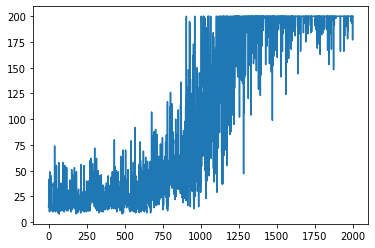

In [163]:
plt.plot(results_ppo)
plt.show()